In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from prettytable import PrettyTable
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("employee_promotion.csv", encoding = "ISO-8859-1", engine="python")

In [3]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [4]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [6]:
data.shape

(54808, 13)

In [7]:
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
is_promoted               int64
dtype: object

In [8]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [9]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


## Univariate Analysis

### Numeric features distribution

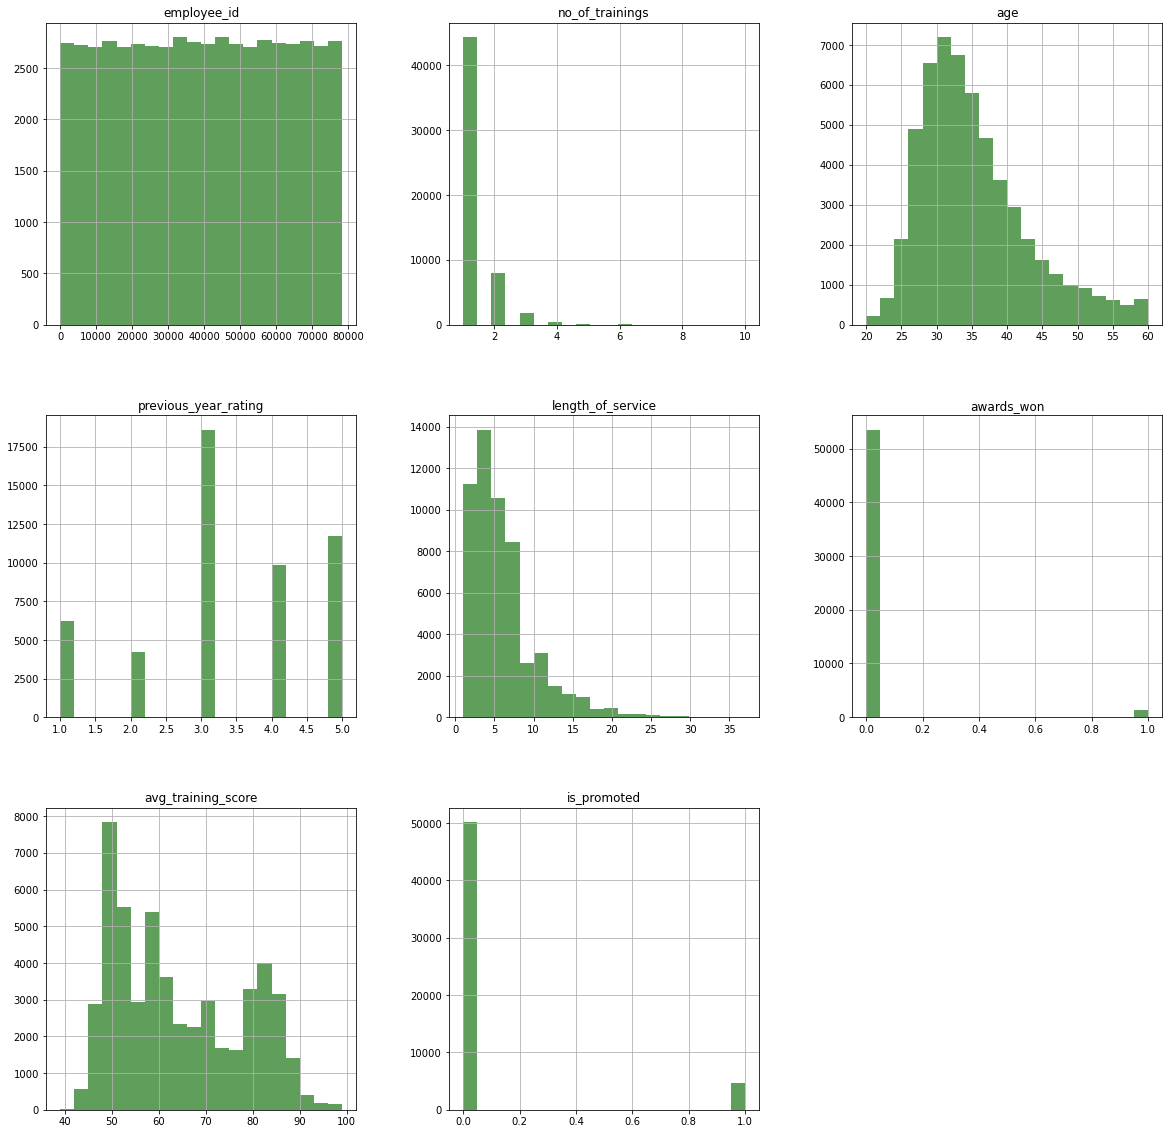

In [10]:
data.hist(figsize=(20,20), bins=20, color="#107009AA")
plt.title("Numeric Features Distribution")
plt.show()

#### As we can see above, there are the values ranges of all features. Every feature have different distribution of values. 
#### To understand the features better and deeper, we are going to look at each one separately.

#### Department distribution

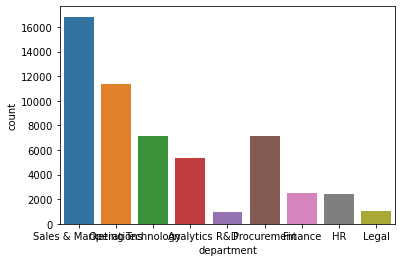

In [11]:
sns.countplot(data = data, x = 'department')
plt.show()

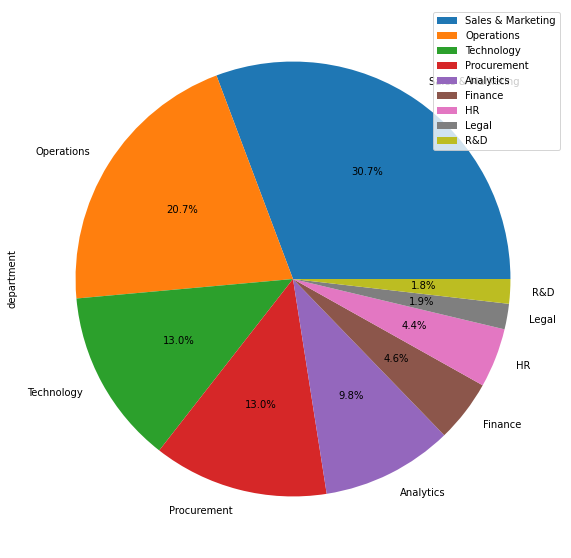

In [12]:
data["department"].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10)).legend()

#### We can see that, Sales and marketing department employees data is more than other departments. Its 30% in whole data and on #### the second number, Operations department is 20%.

#### region distribution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'region_7'),
  Text(1, 0, 'region_22'),
  Text(2, 0, 'region_19'),
  Text(3, 0, 'region_23'),
  Text(4, 0, 'region_26'),
  Text(5, 0, 'region_2'),
  Text(6, 0, 'region_20'),
  Text(7, 0, 'region_34'),
  Text(8, 0, 'region_1'),
  Text(9, 0, 'region_4'),
  Text(10, 0, 'region_29'),
  Text(11, 0, 'region_31'),
  Text(12, 0, 'region_15'),
  Text(13, 0, 'region_14'),
  Text(14, 0, 'region_11'),
  Text(15, 0, 'region_5'),
  Text(16, 0, 'region_28'),
  Text(17, 0, 'region_17'),
  Text(18, 0, 'region_13'),
  Text(19, 0, 'region_16'),
  Text(20, 0, 'region_25'),
  Text(21, 0, 'region_10'),
  Text(22, 0, 'region_27'),
  Text(23, 0, 'region_30'),
  Text(24, 0, 'region_12'),
  Text(25, 0, 'region_21'),
  Text(26, 0, 'region_8'),
  Text(27, 0, 'region_32'),
  Text(28, 0, 'region_6'),
  Text(29, 0, 'region_33'),
  Text(30, 0, 'region_2

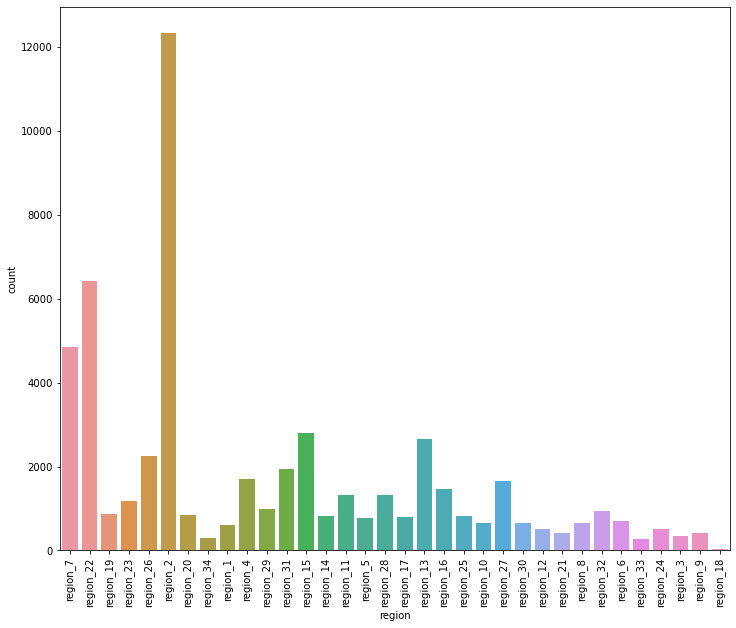

In [13]:
plt.figure(figsize=(12, 10))
sns.countplot(data.region)
plt.xticks(rotation=90)

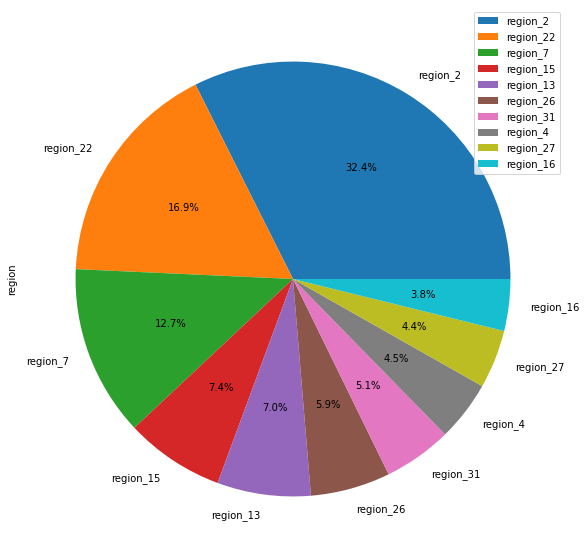

In [14]:
data["region"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

#### If we look at the region, region_2 is more in counts with 32% and region_22 is 16% and region_7 is 12%. It means that these three regions cover almost 60% data.

#### education distribution

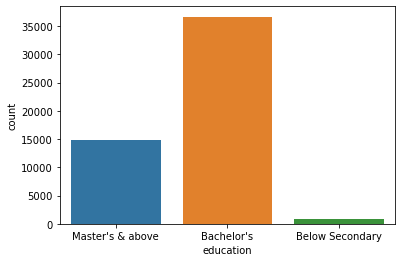

In [15]:
sns.countplot(data = data, x = "education")
plt.show()

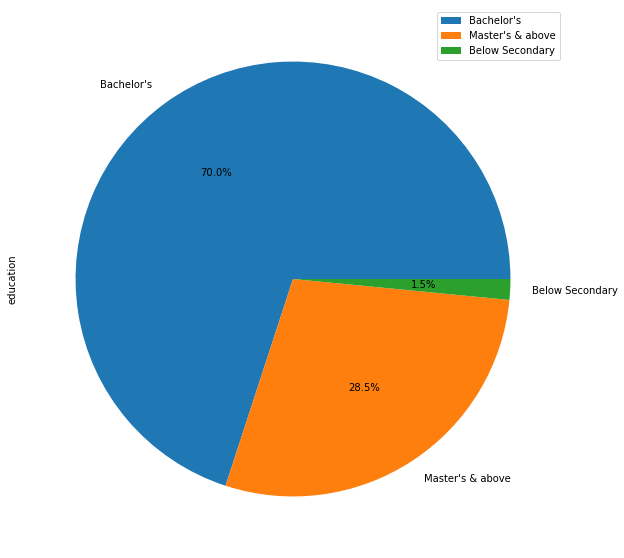

In [16]:
data['education'].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

#### If we look at the education of employees, Bacherlors are too much with 70% data, 28% Master and 1.5 below secondary education.

#### gender distribution

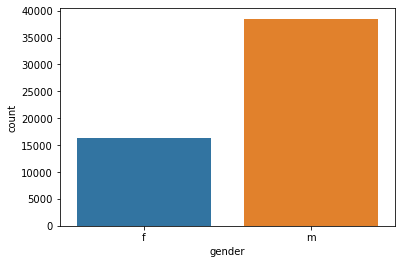

In [17]:
sns.countplot(data = data, x = "gender")
plt.show()

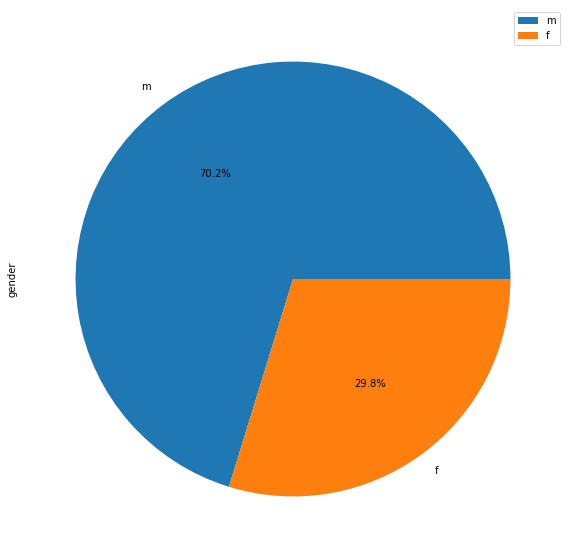

In [18]:
data['gender'].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

#### If we look at the gender, male category are too much again with almost 38K data and female category about 16K.

#### recruitment_channel distribution

<AxesSubplot:xlabel='recruitment_channel', ylabel='count'>

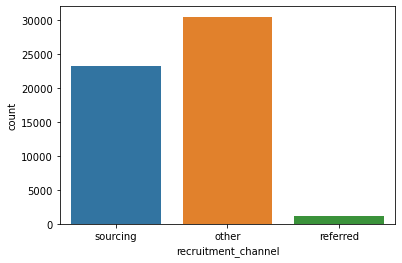

In [19]:
sns.countplot(data = data, x = 'recruitment_channel')

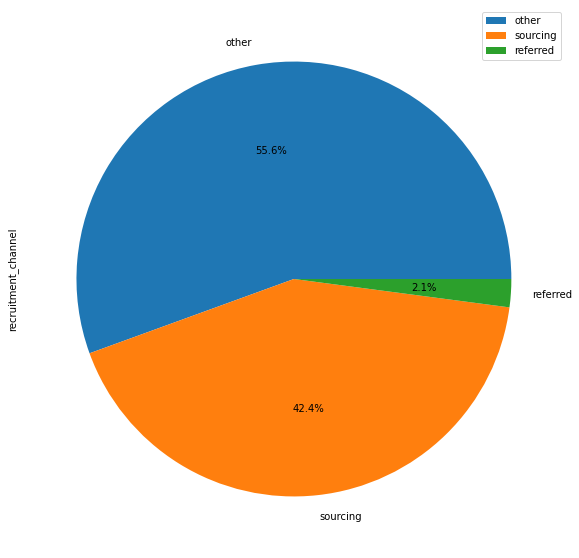

In [20]:
data['recruitment_channel'].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

#### In the recruitment_channel, other are 55%,referred cases are 2% and sourcing 42%.

#### no_of_trainings distribution

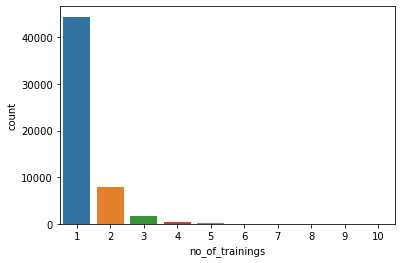

In [21]:
sns.countplot(data = data, x = 'no_of_trainings')
plt.show()

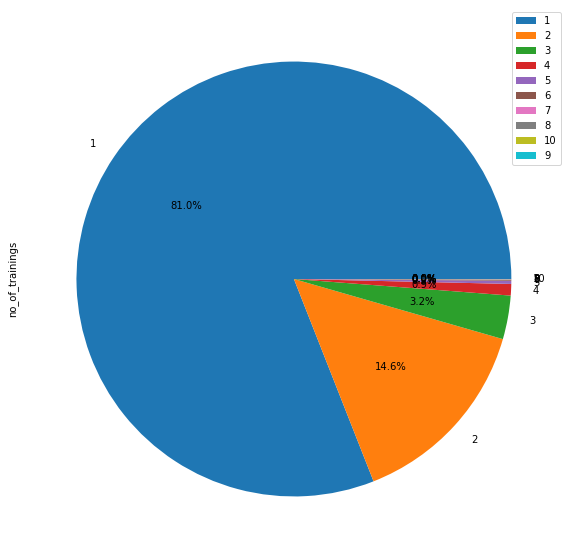

In [22]:
data['no_of_trainings'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

#### If we look at the no_of_trainings, all employees participated one time with 81%.

#### age distribution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, '20'),
  Text(1, 0, '21'),
  Text(2, 0, '22'),
  Text(3, 0, '23'),
  Text(4, 0, '24'),
  Text(5, 0, '25'),
  Text(6, 0, '26'),
  Text(7, 0, '27'),
  Text(8, 0, '28'),
  Text(9, 0, '29'),
  Text(10, 0, '30'),
  Text(11, 0, '31'),
  Text(12, 0, '32'),
  Text(13, 0, '33'),
  Text(14, 0, '34'),
  Text(15, 0, '35'),
  Text(16, 0, '36'),
  Text(17, 0, '37'),
  Text(18, 0, '38'),
  Text(19, 0, '39'),
  Text(20, 0, '40'),
  Text(21, 0, '41'),
  Text(22, 0, '42'),
  Text(23, 0, '43'),
  Text(24, 0, '44'),
  Text(25, 0, '45'),
  Text(26, 0, '46'),
  Text(27, 0, '47'),
  Text(28, 0, '48'),
  Text(29, 0, '49'),
  Text(30, 0, '50'),
  Text(31, 0, '51'),
  Text(32, 0, '52'),
  Text(33, 0, '53'),
  Text(34, 0, '54'),
  Text(35, 0, '55'),
  Text(36, 0, '56'),
  Text(37, 0, '57'),
  Text(38, 0, '58'),
 

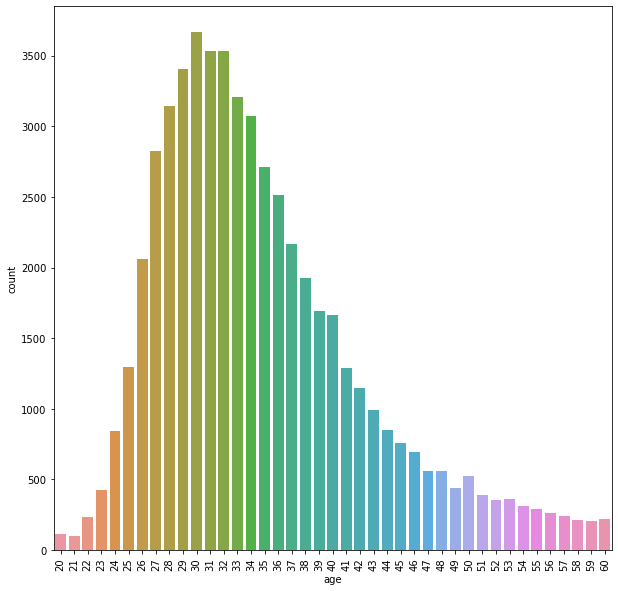

In [23]:
plt.figure(figsize=(10, 10))
sns.countplot(data.age)
plt.xticks(rotation=90)

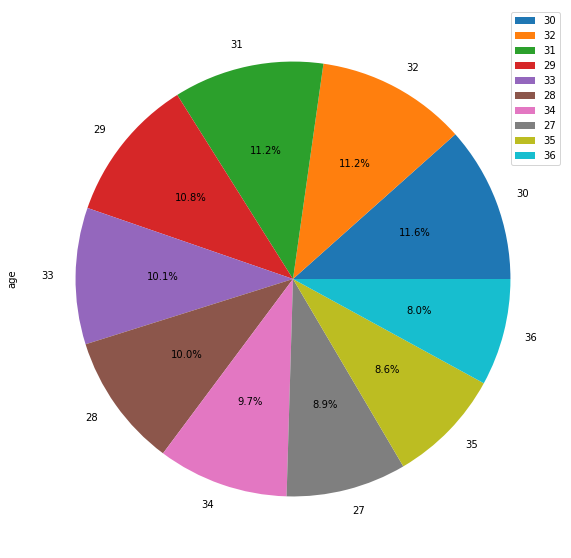

In [24]:
data['age'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

#### As we can see from our pie diagram, most ages are from 27 to 36.

#### previous_year_rating distribution

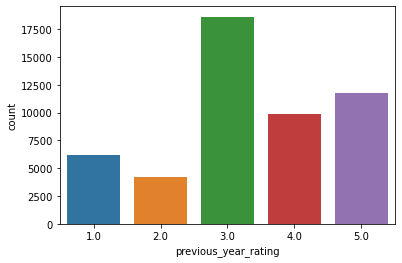

In [25]:
sns.countplot(data = data, x = 'previous_year_rating')
plt.show()

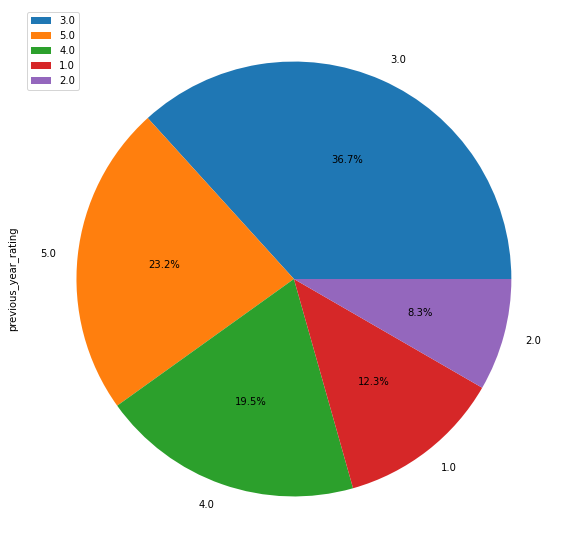

In [26]:
data['previous_year_rating'].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

#### Rating 3 is most used for the employees in all data with 36%. 5 rating with 23%.

#### length_of_service distribution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31'),
  Text(31, 0, '32'),
  Text(32, 0, '33'),
  Text(33, 0, '34'),
  Text(34, 0, '37')])

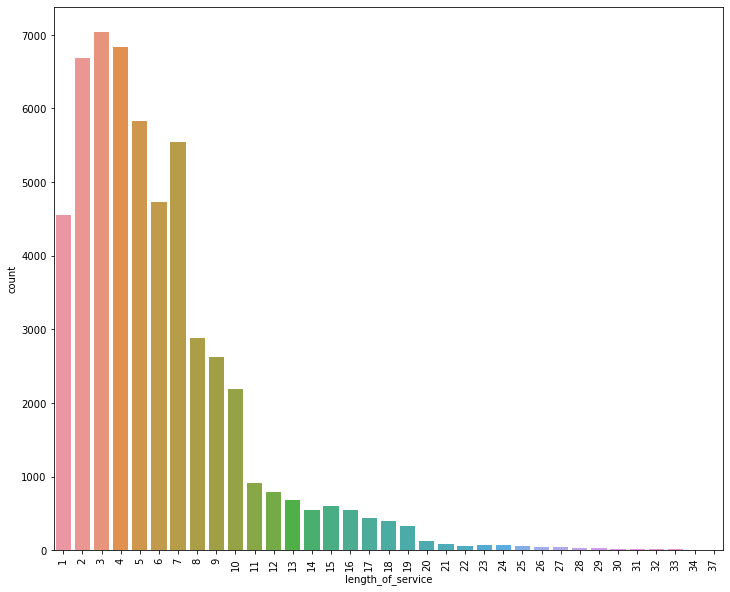

In [27]:
plt.figure(figsize=(12,10))
sns.countplot(data.length_of_service)
plt.xticks(rotation=90)

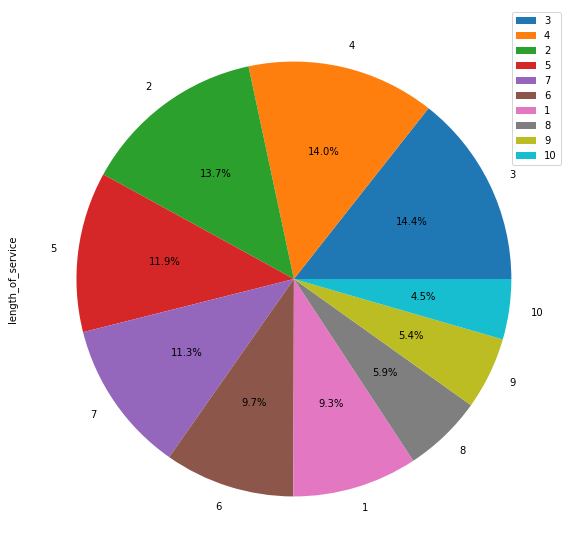

In [28]:
data['length_of_service'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

#### Length of service is from 1 to 10 years. After 10 years, there are few employees.

#### awards_won distribution

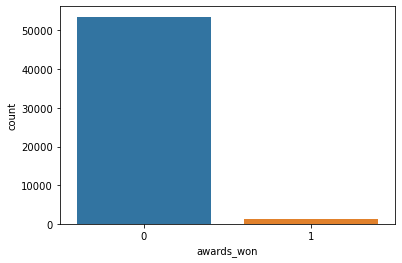

In [29]:
sns.countplot(data = data, x='awards_won')
plt.show()

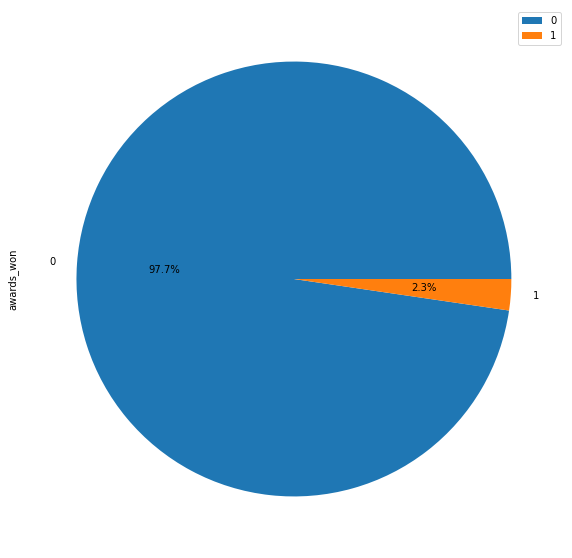

In [30]:
data['awards_won'].value_counts().head(7).plot(kind = 'pie', autopct = '%1.1f%%', figsize=(10, 10), startangle = 0).legend()

#### Only 2.3% employees won the awards and 97.7% did not won. Looking at awards, its very less ratio.

#### avg_training_score distribution

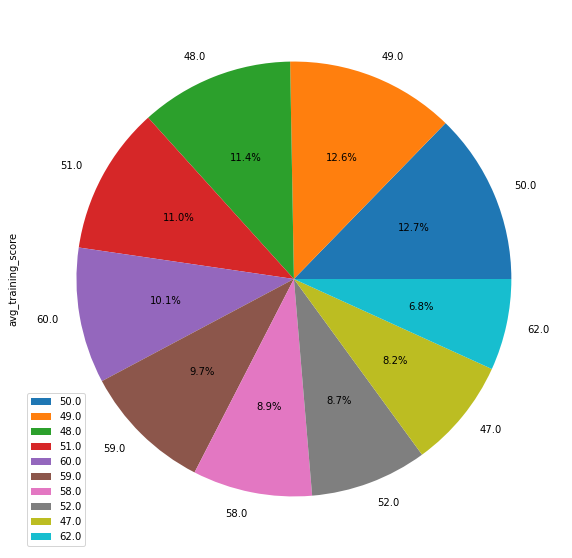

In [31]:
data["avg_training_score"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

#### Most of the average training score of employees ranges in 48.0, 49.0, 50.0, 51.0 and 60.0.

#### is_promoted distribution

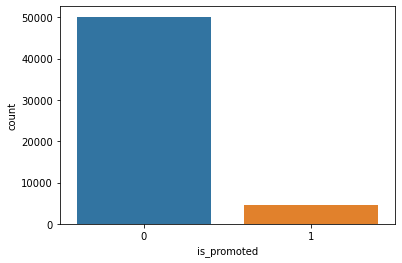

In [32]:
sns.countplot(data = data, x = 'is_promoted')
plt.show()

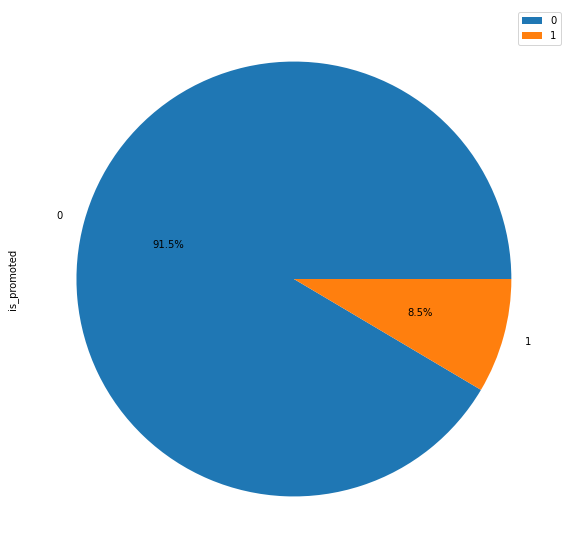

In [33]:
data['is_promoted'].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10,10), startangle=0).legend()

In [34]:
data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

#### We can clearly see that, the data is not balanced. The promoted employees are only 4668 and not promoted employees are 50140. 91% and 9% ratio is very unbalanced.

#### Distribution of promoted employees ratio across different no_of_trainings

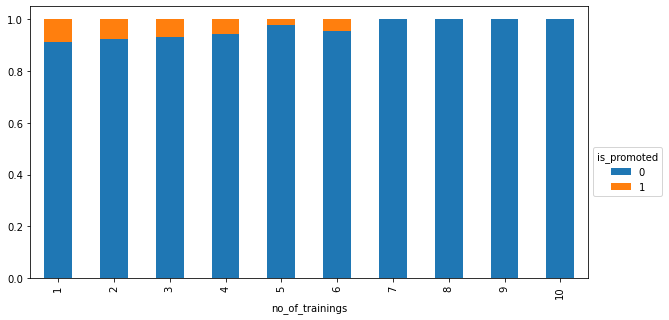

In [35]:
plt.rcParams['figure.figsize'] = (10, 5)
score_bin = pd.crosstab(data.no_of_trainings, data.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title = 'is_promoted', loc='upper left', bbox_to_anchor=(1, 0.5))

#### From no of trainings 1 to 6, employees are promoted. From no of trainings 7 to 10, employees are not promoted.

#### Distrbution of promoted employees ratio across previous_year_rating

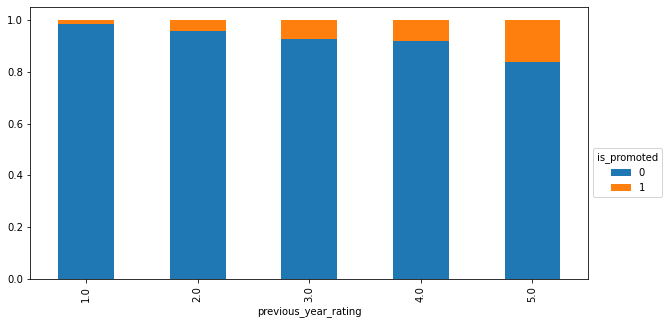

In [36]:
plt.rcParams['figure.figsize'] = (10, 5)
score_bin = pd.crosstab(data.previous_year_rating, data.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted', loc='upper left', bbox_to_anchor=(1, 0.5))

#### Previous year training matter for employee promotion. As we can see that more years training means more employees promoted.

#### Distribution of promoted employees ratio across different length_of_service

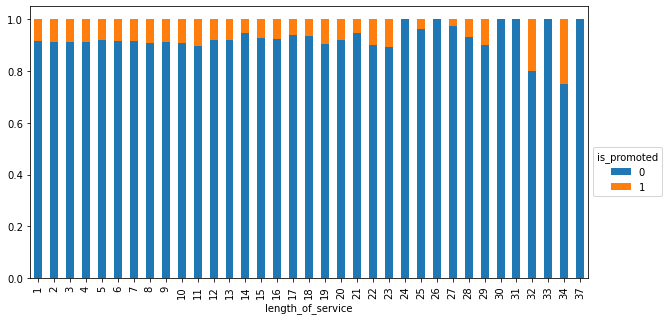

In [37]:
plt.rcParams['figure.figsize'] = (10, 5)
score_bin=pd.crosstab(data.length_of_service, data.is_promoted, normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted', loc='upper left', bbox_to_anchor=(1, 0.5))

#### From year of service 1 to 23, employees promoted but in after 24 years of service, peoples are often promoted.

#### Distribution of promoted employees ratio across different awards won

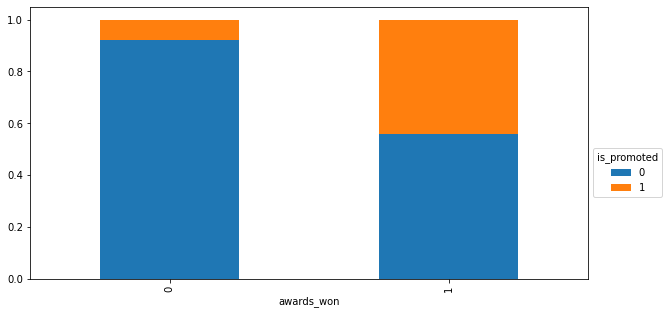

In [38]:
plt.rcParams['figure.figsize']=(10, 5)
score_bin = pd.crosstab(data.awards_won, data.is_promoted, normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted', loc='upper left', bbox_to_anchor=(1, 0.5))

#### Wining awards means more chances to get promoted. as we can see that employees with awards have higher count of promotions.

#### Distribution of promoted employees ratio across different avg_training_score

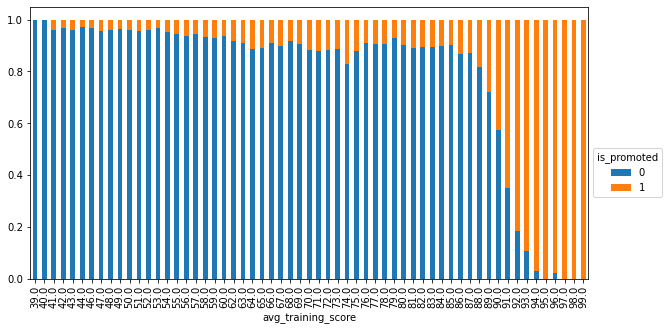

In [39]:
plt.rcParams['figure.figsize'] = (10, 5)
score_bin = pd.crosstab(data.avg_training_score, data.is_promoted, normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted', loc='upper left', bbox_to_anchor=(1, 0.5))

#### More training score means more chances of promotion.

#### Checking categorical type columns in data

In [40]:
data.select_dtypes(include = 'object')

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing
54804,Operations,region_27,Master's & above,f,other
54805,Analytics,region_1,Bachelor's,m,other
54806,Sales & Marketing,region_9,NaN,m,sourcing


#### Encoding these categorical features into numeric data

In [41]:
pro = preprocessing.LabelEncoder()
encpro = pro.fit_transform(data['department'])
data['department'] = encpro

pro = preprocessing.LabelEncoder()
encpro = pro.fit_transform(data['region'])
data['region']  = encpro

pro = preprocessing.LabelEncoder()
encpro = pro.fit_transform(data['education'])
data['education'] = encpro

pro = preprocessing.LabelEncoder()
encpro = pro.fit_transform(data['gender'])
data['gender'] = encpro

pro = preprocessing.LabelEncoder()
encpro = pro.fit_transform(data['recruitment_channel'])
data['recruitment_channel'] = encpro

In [42]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,0,49.0,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,60.0,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,50.0,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,50.0,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,73.0,0


## Bivariate Analysis

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

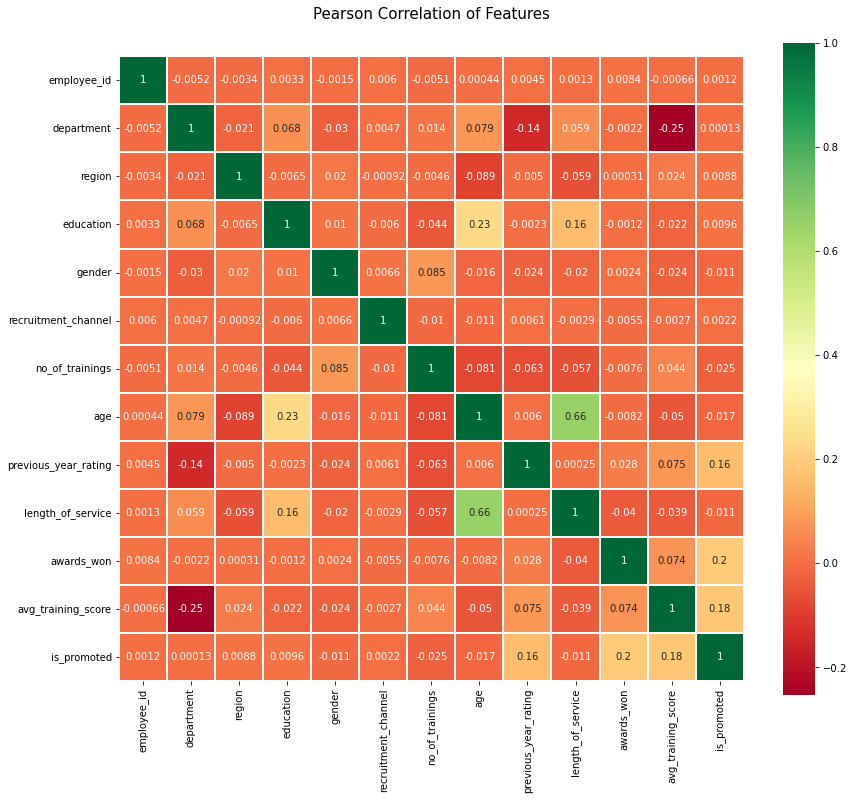

In [43]:
plt.figure(figsize = (14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap = "RdYlGn", linecolor='white', annot=True)

#### promoted target is good correlated with the following features:
1) employee id
2) department
3) region
4) education
5) recruitment_channel
6) previous_year_rating
7) awards_won
8) avg_training_score

#### promoted target is not good correlated with the following features:
1) gender
2) no_of_training
3) age
4) length_of_service

### Age v/s is_promoted

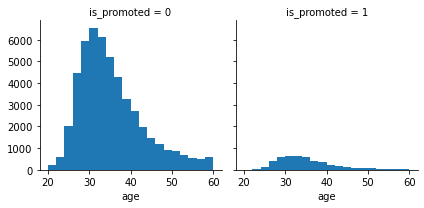

In [44]:
a = sns.FacetGrid(data, col='is_promoted')
a.map(plt.hist, 'age', bins=20)

#### The figure above shows that employees with more ages are not promoted and employees with less ages are promoted.

### Age v/s is_promoted

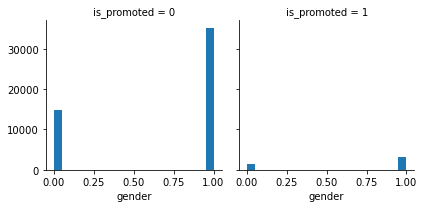

In [45]:
a = sns.FacetGrid(data, col = 'is_promoted')
a.map(plt.hist, 'gender', bins=20)

#### The counts of gender are more in not promoted and less in promoted. Males are more in both cases.

### recruitment_channel v/s is_promoted

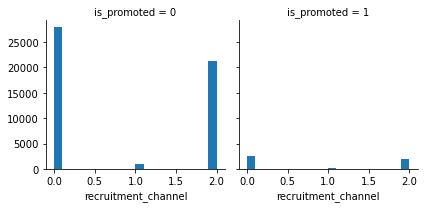

In [46]:
a = sns.FacetGrid(data, col='is_promoted')
a.map(plt.hist, 'recruitment_channel', bins=20)

#### As specified in graph, employees that are less likely to be promoted that are either sourcing or hired from outside.

### no_of_trainings v/s is_promoted

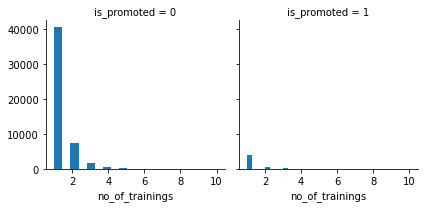

In [47]:
a = sns.FacetGrid(data, col='is_promoted')
a.map(plt.hist, 'no_of_trainings', bins=20)

#### The number of trainings is directly proportional to promoted emplyees, means from 1 to 3 number of trainings employees are promoted while others are not promoted.

### previous_year_rating v/s is_promoted

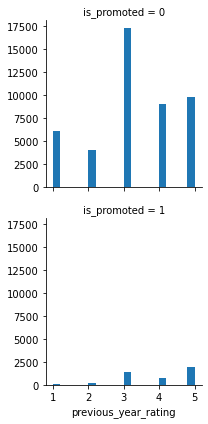

In [48]:
a=sns.FacetGrid(data, 'is_promoted')
a.map(plt.hist, 'previous_year_rating', bins=20)

#### The probability of employees getting promotion also highly depend on previous year rating or how good their performance was in previous years. Those with good rating are highly promoted than those with less rating.

### length_of_service v/s is_promoted

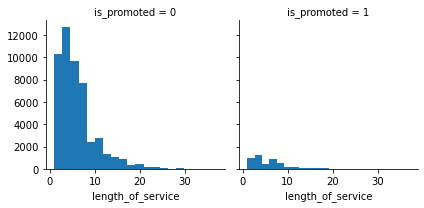

In [49]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'length_of_service', bins=20)

#### Similarly, the more years the employees have served the company are getting highly promoted than those with less length of service. In short, promotion is based on experience according to this feature.

### awards_won v/s is_promoted

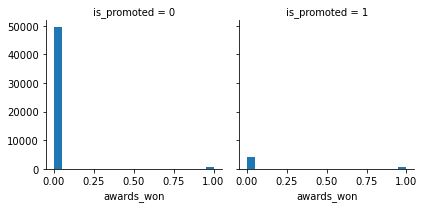

In [50]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'awards_won', bins=20)

#### The employees who have won awards are more likely to get promoted than employees who haven't won such awards.

### avg_training_score v/s is_promoted

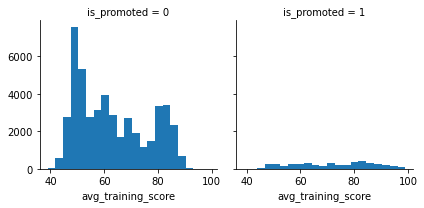

In [51]:
g=sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'avg_training_score', bins=20)

#### The more average training score the more chances employee have to get promoted.

## Multivariate Analysis

#### Pair plot

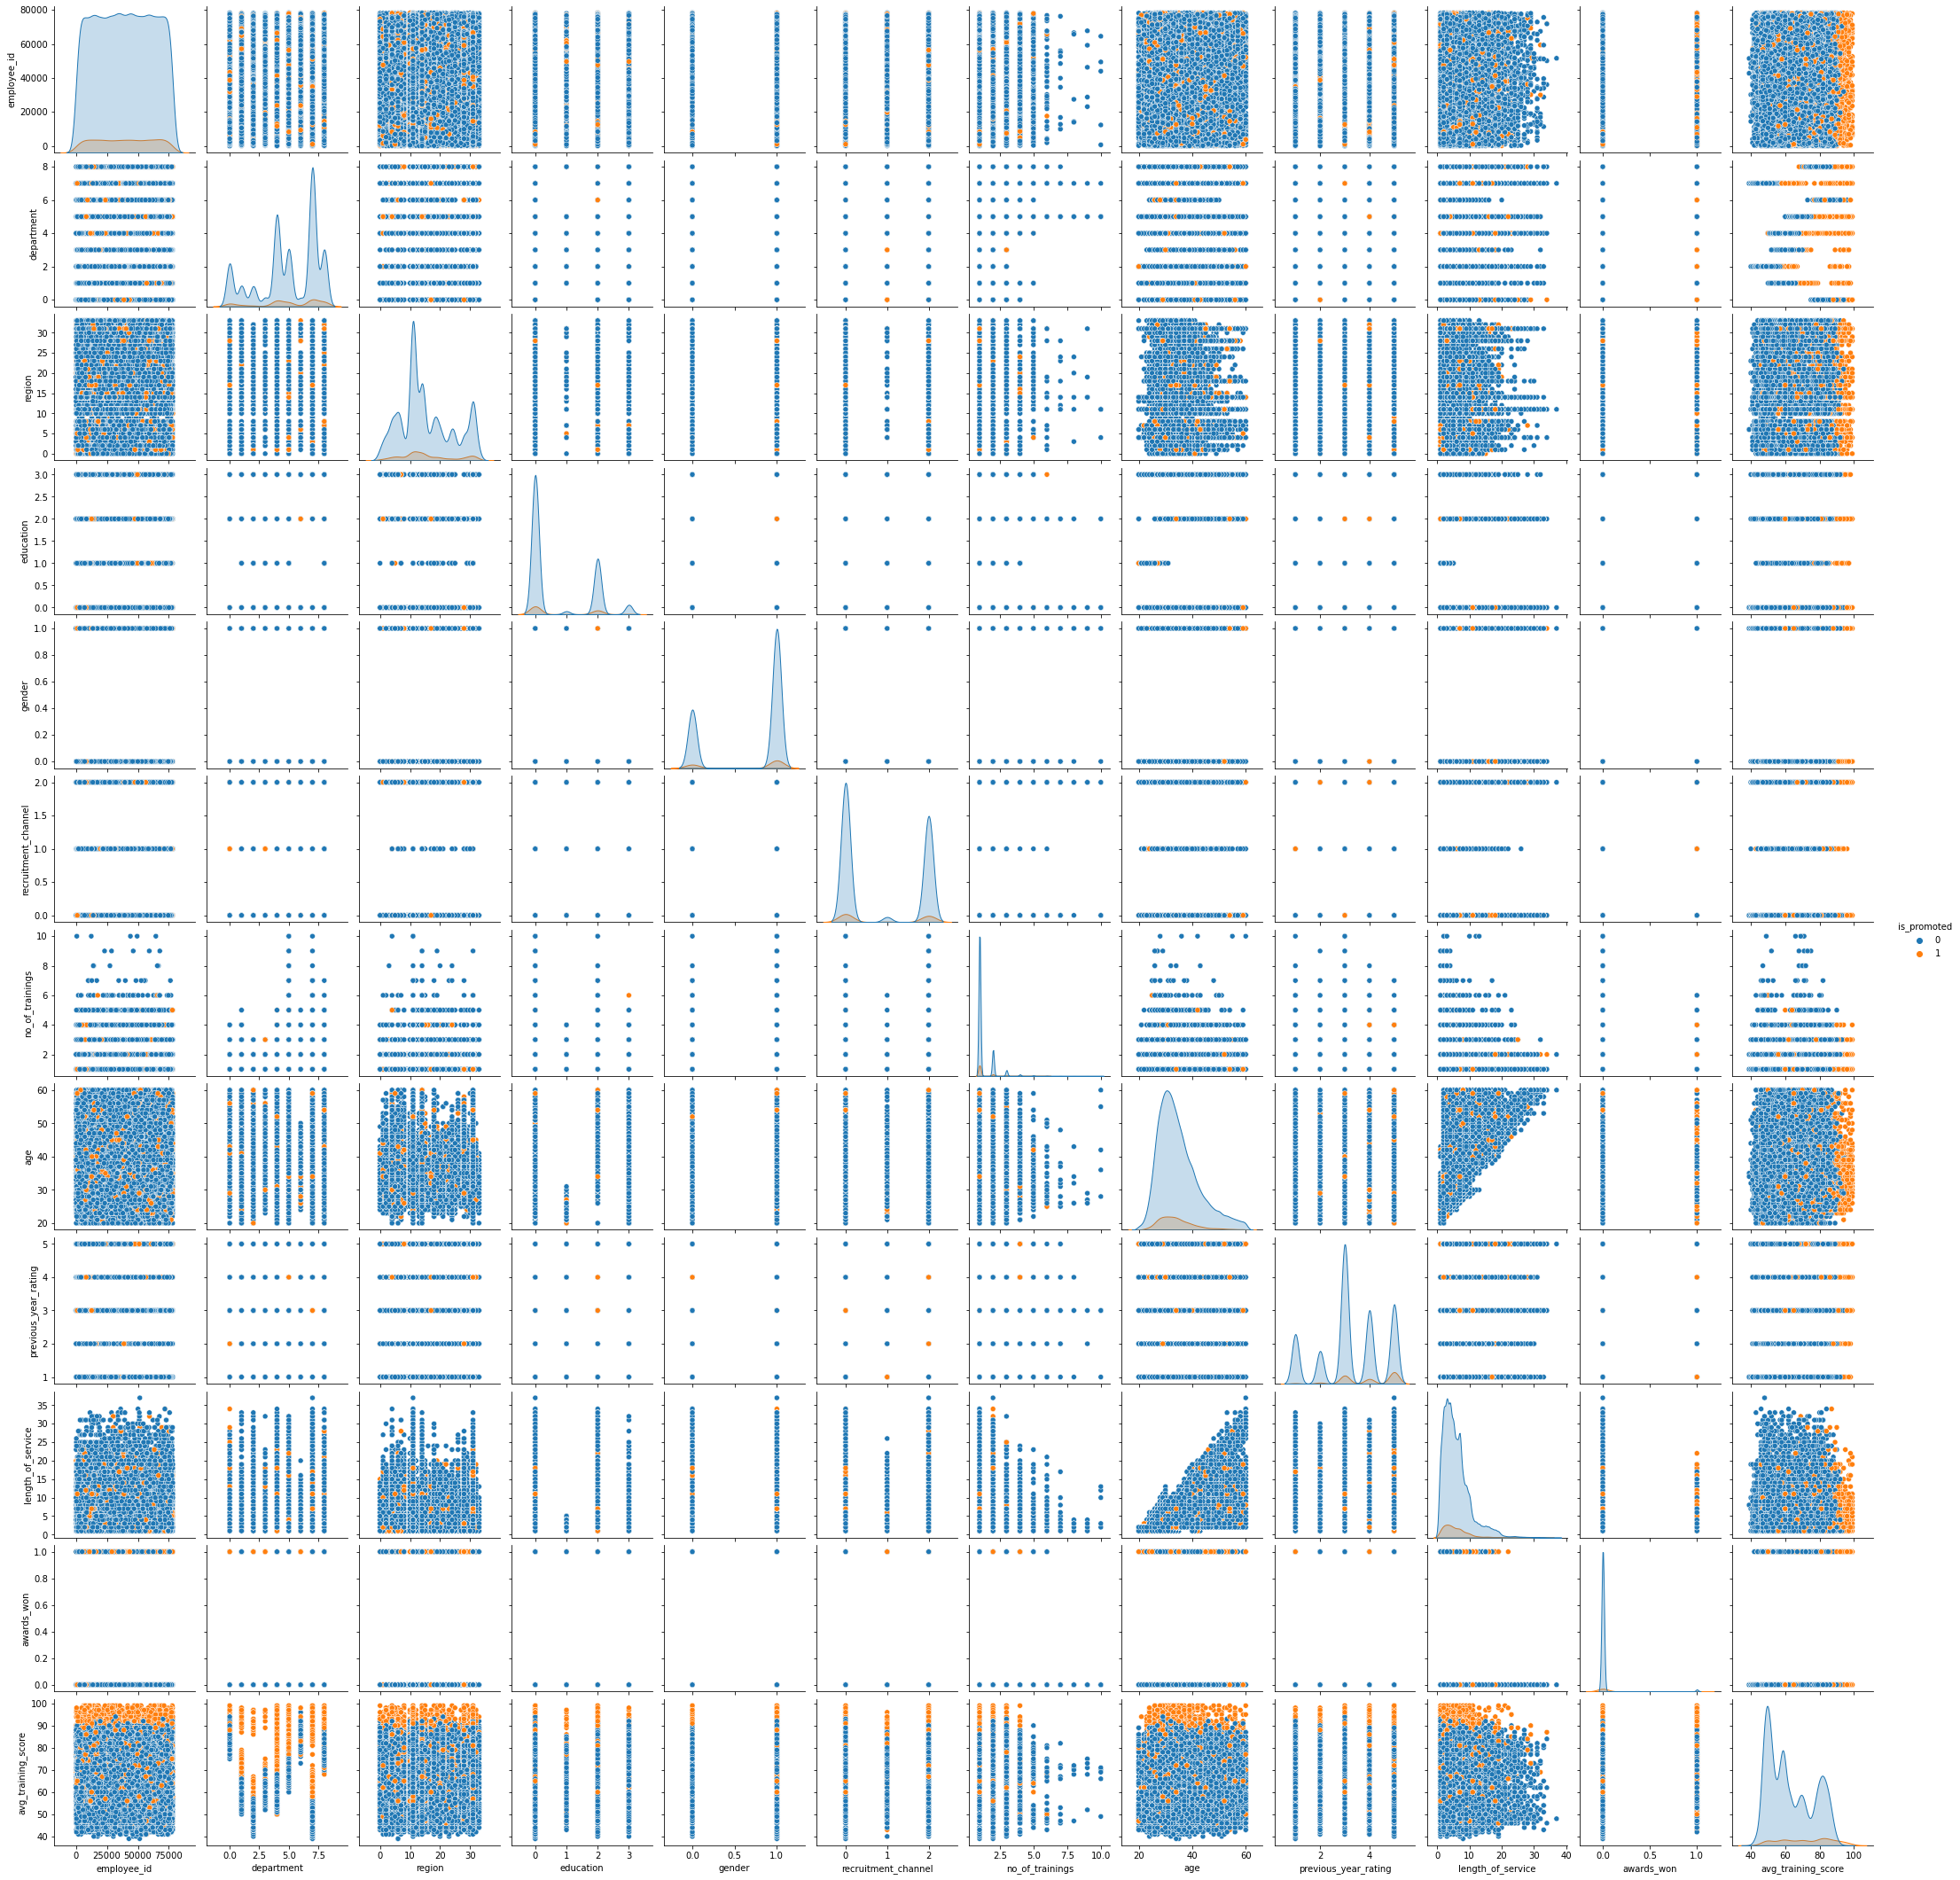

In [52]:
sns.pairplot(data, diag_kind='kde',hue='is_promoted' )

#### The Pairplot is showing the relationship of all with each other. In some comparisons, the features are distributed more and that is the case of continuous.

# Data Preparation

### Deleting the duplicate rows

In [53]:
curr = len(data)
print('Rows of data before deleting-', curr)

Rows of data before deleting- 54808


In [54]:
data=data.drop_duplicates()

In [55]:
now = len(data)
print('Rows of data after deleting-', now)

Rows of data after deleting- 54808


In [56]:
diff = curr-now
print('Duplicated rows deleted-', diff)

Duplicated rows deleted- 0


#### Dropping the Employee_Id in the data because it is not useful and helpful for training and helping to predict the employee promotion.

In [57]:
data = data.drop(columns=['employee_id'])

#### Missing Value Treatment

In [58]:
data.isnull().sum()

department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [59]:
data.isnull().sum().sum()/len(data)

0.12195299956210773

#### There are almost 16% missing values in data

#### Let's calculate total missing values in each column

In [60]:
data_total = data.isnull().sum()
data_percent = ((data.isnull().sum()/data.shape[0])*100).round(2)
missing_data = pd.concat([data_total, data_percent],
                                axis=1, 
                                keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],
                                sort = True)
missing_data.style.bar(color = ['gold'])

,Train_Total,Train_Percent %
age,0,0.000000
avg_training_score,2560,4.670000
awards_won,0,0.000000
department,0,0.000000
education,0,0.000000
gender,0,0.000000
is_promoted,0,0.000000
length_of_service,0,0.000000
no_of_trainings,0,0.000000
previous_year_rating,4124,7.520000


#### working on previous_year_rating

In [61]:
a = data[data['previous_year_rating'].isnull()]
a.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
10,8,15,3,1,2,1,30,NaN,1,0,77.0,0
23,5,29,0,1,0,1,27,NaN,1,0,70.0,0
29,7,28,0,1,2,1,26,NaN,1,0,44.0,0
56,7,24,0,0,0,1,29,NaN,1,0,49.0,0
58,7,7,0,1,0,2,27,NaN,1,0,47.0,0


In [62]:
a['length_of_service'].value_counts()

1    4124
Name: length_of_service, dtype: int64

##### Since the length of service is 1 for all the employees with previous year rating as null.,which means they are the new recruits with 1 year experience. So they may not be having the previous year rating.We impute 0 for the null values.

In [63]:
data['previous_year_rating'].fillna(value=0, inplace=True)

In [64]:
data['education'] = data['education'].fillna(data['education'].mode()[0])
data['avg_training_score'] = data['avg_training_score'].fillna(data['avg_training_score'].mode()[0])

In [65]:
data.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

### Target:

#### Target are the Results like in this project 1 and 0 are Target.

### Inputs:

#### Inputs are the data features that we feed into model like in this project department, region,education,gender are the inputs.

### Training data

#### We use training data when we train the models. We feed train data to tensorflow model so that model can learn from the data.

### Testing data

##### We use testing data after training the model. We use this data to evaluate the performance that how the model perform after training. So, in this way, we give predictions from the trained model without giving target and then we compare the true target with predictions and get the performance.

#### Separating input feature and label

In [66]:
X = data.drop(columns='is_promoted')
y = data['is_promoted']

## Model Building - Logistic Regression 

#### Make logistic regression with upsampled data

In [67]:
smt = SMOTE()
X_up, y_up = smt.fit_resample(X, y)

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

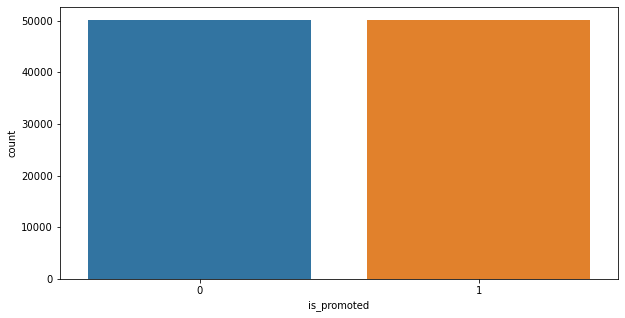

In [68]:
sns.countplot(data = data, x = y_up)

#### Separating the 70% data for training data and 30% for testing data

#### As we prepared all the data, now we are separating/splitting the all data into training data and testing data.

70% data will be used in the training
30% data will be used to test the performance of the model.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=2)

#### Training the random forest model

In [70]:
random = RandomForestClassifier()
random = random.fit(X_train, y_train)
random

RandomForestClassifier()

#### Evaluation of Trained model on test data

#### Accuracy

#### Accuracy is the number of correctly classify the promoted and not promoted.

#### Accuracy= Total number of correct predictions/Total number of predictions

In [71]:
print('Test set\n  Accuracy: {:0.2f}'.format(random.score(X_test, y_test)))

Test set
  Accuracy: 0.95


#### Getting predictions of test data and the we will compare the true target/classes of the data with predictions. 

In [72]:
y_pred = random.predict(X_test)

#### Precision score on test data

##### Precision measures the number of positive class predictions that actually belongs to positive class.

In [73]:
print('Precision',round(f1_score(y_test, y_pred, average='micro'),3),'%')

Precision 0.951 %


#### Recall score on test data

##### Recall measures the number of positive class predictions made out of all positive records in the dataset

In [74]:
print('Recall',round(recall_score(y_test, y_pred, average='micro'),4),'%')

Recall 0.9513 %


#### F-measure score on test data

##### F-measure is the average of precision and recall.

In [75]:
print('F1',round(f1_score(y_test, y_pred, average='micro'),2),'%')

F1 0.95 %


### Logistic Regression with downsampled data

In [76]:
data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [77]:
promoted=data[data["is_promoted"]==1] #getting the promoted employees
not_promoted=data[data["is_promoted"]==0] #getting not promoted employees
not_promoted=not_promoted.sample(4668) #getting only 4668 fromnot employees to down sample the data equal
downsample=pd.concat([promoted, not_promoted]) #now combining both
downsample

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
11,7,31,0,0,2,1,35,5.0,3,0,50.0,1
39,7,20,0,1,2,1,33,5.0,6,0,51.0,1
60,7,28,2,1,0,1,50,4.0,17,0,47.0,1
66,1,14,0,1,0,1,27,0.0,1,1,58.0,1
67,7,14,0,1,2,1,27,0.0,1,0,50.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7773,7,2,0,1,0,2,25,2.0,2,0,51.0,0
53574,8,7,0,0,2,1,29,3.0,2,0,75.0,0
13328,7,11,0,1,0,1,56,4.0,3,0,52.0,0
20937,1,3,0,1,0,4,29,0.0,1,0,50.0,0


<AxesSubplot:xlabel='is_promoted', ylabel='count'>

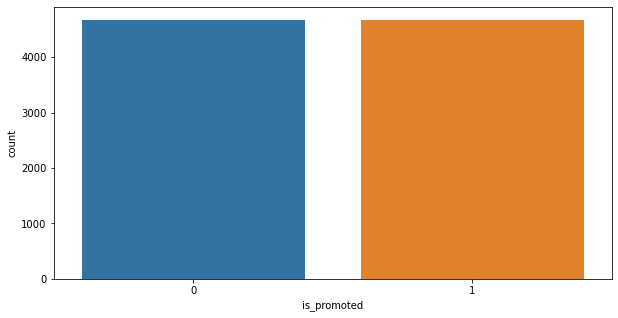

In [78]:
sns.countplot(data= data, x = downsample['is_promoted'])

#### Separating the 70% data for training data and 30% for testing data

#### As we prepared all the data, now we are separating/splitting the all data into training data and testing data.

70% data will be used in the training
30% data will be used to test the performance of the model.

In [79]:
X_train, X_test, y_train, y_test = train_test_split(downsample.drop(columns=['is_promoted']), downsample['is_promoted'], test_size=0.3, random_state=2)

#### Training the random forest model

In [80]:
random = RandomForestClassifier()
random = random.fit(X_train, y_train)
random

RandomForestClassifier()

### Evaluation of trained model on test data

#### Accuracy
Accuracy is the number of correctly classify promoted or not promoted.
Accuracy= Total number of correct predictions/Total number of predictions

In [81]:
print('Test set\n  Accuracy: {:0.2f}'.format(random.score(X_test, y_test)))

Test set
  Accuracy: 0.70


#### Getting prediction of the test data and then we will compare the true Target/classes of the data with predictions

In [82]:
y_pred = random.predict(X_test) #getting predictions on the trained model

#### Precision Score on test data

#### Precision measure the number of positive class predictions that actually belong to the positive class

In [83]:
print('Precision',round(f1_score(y_test, y_pred, average='micro'),3),'%')

Precision 0.699 %


#### Recall score on test data

#### Recall measures the number of positive class predictions made out of all positive records in the dataset

In [84]:
print('Recall',round(recall_score(y_test, y_pred, average='micro'),4),'%')

Recall 0.6994 %


#### F1 measure score on test data

#### F1 measure is the average of precision and recall.

In [85]:
print('F1',round(f1_score(y_test, y_pred, average='micro'),2),'%')

F1 0.7 %


## Model building - Bagging and Boosting

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

### Decision Tree Model

In [87]:
DT = DecisionTreeClassifier()
DT = DT.fit(X_train , y_train)
DT

DecisionTreeClassifier()

In [88]:
dt=DT.score(X_test, y_test)
print('Test set\n  Accuracy: {:0.2f}'.format(DT.score(X_test, y_test))) 
#the accuracy of the model on test data is given below

Test set
  Accuracy: 0.88


#### Random Forest Classifier Model

In [89]:
RF = RandomForestClassifier()
RF = RF.fit(X_train , y_train)
RF

RandomForestClassifier()

In [90]:
rf = RF.score(X_test, y_test)
print('Test set\n  Accuracy: {:0.2f}'.format(RF.score(X_test, y_test))) #the accuracy of the model on test data is given below

Test set
  Accuracy: 0.93


#### Bagging Classifier Model

In [91]:
BC=BaggingClassifier()
BC= BC.fit(X_train , y_train)
BC

BaggingClassifier()

In [92]:
bc=BC.score(X_test, y_test)
print('Test set\n  Accuracy: {:0.2f}'.format(BC.score(X_test, y_test))) 
#the accuracy of the model on test data is given below

Test set
  Accuracy: 0.93


#### XGB Classifier Model

In [93]:
XG=XGBClassifier(verbosity = 0)
XG= XG.fit(X_train , y_train)
XG

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [94]:
xg=XG.score(X_test, y_test)
print('Test set\n  Accuracy: {:0.2f}'.format(XG.score(X_test, y_test))) 
#the accuracy of the model on test data is given below

Test set
  Accuracy: 0.94


#### AdaBoost Classifier Model

In [95]:
AD=AdaBoostClassifier()
AD= AD.fit(X_train , y_train)
AD

AdaBoostClassifier()

In [96]:
ad=AD.score(X_test, y_test)
print('Test set\n  Accuracy: {:0.2f}'.format(AD.score(X_test, y_test))) 
#the accuracy of the model on test data is given below

Test set
  Accuracy: 0.92


#### Gradient Boosting Classifier Model

In [97]:
GB=GradientBoostingClassifier()
GB= GB.fit(X_train , y_train)
GB

GradientBoostingClassifier()

In [98]:
gb=GB.score(X_test, y_test)
print('Test set\n  Accuracy: {:0.2f}'.format(GB.score(X_test, y_test)))
#the accuracy of the model on test data is given below

Test set
  Accuracy: 0.94


## Comparison of Bagging and Boosting Models

In [99]:
x = PrettyTable()
print('\n')
x.field_names = ["Model", "Accuracy"]
x.add_row(["Decision Tree Model", round(dt,2)])
x.add_row(["Random Forest Classifier Model", round(rf,2)])
x.add_row(["Bagging Classifier Model", round(bc,2)])
x.add_row(["XGB Classifierr Model", round(xg,2)])
x.add_row(["AdaBoost Classifier Model", round(ad,2)])
x.add_row(["Gradient Boosting Classifier Model", round(gb,2)])

print(x)
print('\n')



+------------------------------------+----------+
|               Model                | Accuracy |
+------------------------------------+----------+
|        Decision Tree Model         |   0.88   |
|   Random Forest Classifier Model   |   0.93   |
|      Bagging Classifier Model      |   0.93   |
|       XGB Classifierr Model        |   0.94   |
|     AdaBoost Classifier Model      |   0.92   |
| Gradient Boosting Classifier Model |   0.94   |
+------------------------------------+----------+




#### XGBoost and Gradient Decent models are giving highest accuracy with 94% which is good. But Decision tree model is lower than others with only 88% accuracy. Random forest,Bagging and Adaboost also performed well with 93% accuracy.

### Hyperparameter Tuning using Grid Search

#### Random Forest Classifier Model

In [100]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [101]:
start = time.time()
RN=RandomForestClassifier()
Grid_RN = GridSearchCV(estimator=RN, param_grid=param_grid, cv= 2)
Grid_RN.fit(X_train, y_train)
end = time.time()
RF_time1=end-start

In [102]:
Grid_RN.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [103]:
print('Execution time is ', RF_time1)

Execution time is  412.80456948280334


#### Recall score of test data  

In [104]:
y_pred = Grid_RN.predict(X_test) #getting predictions on the trained model
rn1=round(recall_score(y_test, y_pred, average='micro'),3)
print('Recall',round(recall_score(y_test, y_pred, average='micro'),3),'%')

Recall 0.925 %


#### The model is giving good results and taking more time on training. 92% accuracy is good but still we can improve the model with different techniques of machine learning.

### XGB Classifier Model

In [105]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [106]:
start = time.time()
XGB=XGBClassifier(verbosity = 0)
Grid_XG = GridSearchCV(estimator=XGB, param_grid=params, cv= 2)
Grid_XG.fit(X_train, y_train)
end = time.time()
XG_time1=end-start

In [107]:
Grid_XG.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.5,
 'max_depth': 4,
 'min_child_weight': 10,
 'subsample': 1.0}

In [108]:
print('Execution time is ', XG_time1)

Execution time is  701.9469993114471


#### Recall score on test data

In [109]:
y_pred = Grid_XG.predict(X_test) #getting predictions on the trained model
xg1=round(recall_score(y_test, y_pred, average='micro'),3)
print('Recall',round(recall_score(y_test, y_pred, average='micro'),3),'%')

Recall 0.941 %


#### The XGboost model is giving more than 94% recall but the training time is more. It would be great if the training time less.

### Gradient Boosting Classifier Model

In [110]:
param = {
    "learning_rate": [0.01, 0.025],
    "min_samples_split": np.linspace(0.1, 0.5),
    "min_samples_leaf": np.linspace(0.1, 0.5),
    }

In [111]:
start = time.time()
BC=GradientBoostingClassifier()
Grid_BC = GridSearchCV(estimator=BC, param_grid=param, cv= 2)
Grid_BC.fit(X_train, y_train)
end = time.time()
BC_time1=end-start

In [112]:
print('Execution time is ', BC_time1)

Execution time is  8984.557376861572


#### Recall Score on test data

In [113]:
y_pred = Grid_BC.predict(X_test) #getting predictions on the trained model
gc1=round(recall_score(y_test, y_pred, average='micro'),3)
print('Recall',round(recall_score(y_test, y_pred, average='micro'),3),'%')

Recall 0.914 %


#### Gradient Boosting model outform over random Forest modelbut XGboost is still good. Also it took very long time to train the model.It is not a good thing to take a lot of time on training.

### Hyperparameter Tuning using Random Search
1) Random Forest Model
2) XGB Classifier Model
3) Gradient Boosting Classifier Model

#### Random Forest Classifier Model

In [114]:
params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [115]:
start = time.time()
RN=RandomForestClassifier()
Grid_RN = RandomizedSearchCV(estimator = RN, param_distributions = params, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
Grid_RN.fit(X_train, y_train)
end = time.time()
RF_time2=end-start

Fitting 2 folds for each of 60 candidates, totalling 120 fits


In [116]:
Grid_RN.best_params_

{'n_estimators': 200,
 'max_features': 'log2',
 'max_depth': 8,
 'criterion': 'gini'}

In [117]:
print('Execution time is ', RF_time2)

Execution time is  136.06748867034912


#### Recall Score on test data

In [118]:
y_pred = Grid_RN.predict(X_test) #getting predictions on the trained model
rn2=round(recall_score(y_test, y_pred, average='micro'),3)
print('Recall',round(recall_score(y_test, y_pred, average='micro'),3),'%')

Recall 0.925 %


#### The model is giving good results and taking reasonable time on training. 92% accuracy is good but still we can improve the model with different techniques of machine learning.

### XGB Classifier Model

In [119]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [120]:
start = time.time()
XGB=XGBClassifier(verbosity = 0)
Grid_XG = RandomizedSearchCV(estimator = XGB, param_distributions = params, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
Grid_XG.fit(X_train, y_train)
end = time.time()
XG_time2=end-start

Fitting 2 folds for each of 100 candidates, totalling 200 fits


In [121]:
Grid_XG.best_params_

{'subsample': 1.0,
 'min_child_weight': 5,
 'max_depth': 5,
 'gamma': 1.5,
 'colsample_bytree': 0.6}

In [122]:
print('Execution time is ', XG_time2)

Execution time is  66.73348259925842


#### Recall score on test data

In [123]:
y_pred = Grid_XG.predict(X_test) #getting predictions on the trained model
xg2=round(recall_score(y_test, y_pred, average='micro'),3)
print('Recall',round(recall_score(y_test, y_pred, average='micro'),3),'%')

Recall 0.941 %


#### The XGboost model is giving more than 94% recall and also taking less time as compare to other models.

#### Gradient Boosting Classifier Model

In [124]:
params = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025],
    "min_samples_split": np.linspace(0.1, 0.5),
    "min_samples_leaf": np.linspace(0.1, 0.5),
    "max_depth":[3,5],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618],
    "n_estimators":[10]
    }

In [125]:
start = time.time()
BC=GradientBoostingClassifier()
Grid_BC = RandomizedSearchCV(estimator = BC, param_distributions = params, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
Grid_BC.fit(X_train, y_train)
end = time.time()
BC_time2=end-start

Fitting 2 folds for each of 100 candidates, totalling 200 fits


In [126]:
Grid_BC.best_params_

{'subsample': 0.618,
 'n_estimators': 10,
 'min_samples_split': 0.48367346938775513,
 'min_samples_leaf': 0.15714285714285714,
 'max_features': 'sqrt',
 'max_depth': 5,
 'loss': 'deviance',
 'learning_rate': 0.01,
 'criterion': 'friedman_mse'}

In [127]:
print('Execution time is ', BC_time2)

Execution time is  9.287268877029419


#### Recall Score on test data

In [128]:
y_pred = Grid_BC.predict(X_test) #getting predictions on the trained model
bc2=round(recall_score(y_test, y_pred, average='micro'),3)
print('Recall',round(recall_score(y_test, y_pred, average='micro'),3),'%')

Recall 0.914 %


#### The results of gradient boosting are not good as compare to other models as XGBoost giving more than 94% accuracy.

# Model Performances

## Comparison of Bagging and Boosting Models using Hyperparameter Tuning using Grid Search

In [129]:
x = PrettyTable()
print('\n')
x.field_names = ["Model", "Recall Metric"]

x.add_row(["Random Forest Classifier Model", round(rn1,2)])
x.add_row(["XGB Classifierr Model", round(xg1,2)])
x.add_row(["Gradient Boosting Classifier Model", round(gc1,2)])

print(x)
print('\n')



+------------------------------------+---------------+
|               Model                | Recall Metric |
+------------------------------------+---------------+
|   Random Forest Classifier Model   |      0.92     |
|       XGB Classifierr Model        |      0.94     |
| Gradient Boosting Classifier Model |      0.91     |
+------------------------------------+---------------+




In [130]:
x = PrettyTable()
print('\n')
x.field_names = ["Model", "Execution Time"]

x.add_row(["Random Forest Classifier Model", round(RF_time1,2)])
x.add_row(["XGB Classifierr Model", round(XG_time1,2)])
x.add_row(["Gradient Boosting Classifier Model", round(BC_time1,2)])

print(x)
print('\n')



+------------------------------------+----------------+
|               Model                | Execution Time |
+------------------------------------+----------------+
|   Random Forest Classifier Model   |     412.8      |
|       XGB Classifierr Model        |     701.95     |
| Gradient Boosting Classifier Model |    8984.56     |
+------------------------------------+----------------+




#### The model is giving good results and taking more time on training. 92% accuracy is good but still we can improve the model with different techniques of machine learning.

#### The XGboost model is giving more than 94% recall but the training time is more. It would be great if the training time less.

#### Gradient Boosting model outform over random Forest model, but XGboost is still good. Also it took very long time to train the model.It is not a good thing to take a lot of time on training.

# Comparison of Bagging and Boosting Models using Hyperparameter Tuning using Random Search

In [131]:
x = PrettyTable()
print('\n')
x.field_names = ["Model", "Recall Metric"]

x.add_row(["Random Forest Classifier Model", round(rn2,2)])
x.add_row(["XGB Classifierr Model", round(xg2,2)])
x.add_row(["Gradient Boosting Classifier Model", round(bc2,2)])

print(x)
print('\n')



+------------------------------------+---------------+
|               Model                | Recall Metric |
+------------------------------------+---------------+
|   Random Forest Classifier Model   |      0.92     |
|       XGB Classifierr Model        |      0.94     |
| Gradient Boosting Classifier Model |      0.91     |
+------------------------------------+---------------+




In [132]:
x = PrettyTable()
print('\n')
x.field_names = ["Model", "Execution Time"]

x.add_row(["Random Forest Classifier Model", round(RF_time2,2)])
x.add_row(["XGB Classifierr Model", round(XG_time2,2)])
x.add_row(["Gradient Boosting Classifier Model", round(BC_time2,2)])

print(x)
print('\n')



+------------------------------------+----------------+
|               Model                | Execution Time |
+------------------------------------+----------------+
|   Random Forest Classifier Model   |     136.07     |
|       XGB Classifierr Model        |     66.73      |
| Gradient Boosting Classifier Model |      9.29      |
+------------------------------------+----------------+




#### Same performance and comments on the random search because we got the same kind of results.

#### The model is giving good results and taking reasonable time on training. 92% accuracy is good but still we can improve the model with different techniques of machine learning.

#### The XGboost model is giving more than 94% recall and also taking less time as compare to other models.

#### The results of gradient boosting are not good as compare to other models as XGBoost giving more than 94% accuracy

#### On Random Search,the models took less training time and got the same accuracy on all models as compared to Grid search.